<a href="https://colab.research.google.com/github/marcustuke/marcustuke/blob/main/Named_entity_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Natural Language Processing

* Step 1: Sentence segmentation
* Step 2: Word tokenization
* Step 3: Stemming
* Step 4: Lemmatization
* Step 5: Stop word analysis
* Step 6: Dependency parsing
* Step 7: Part-of-speech (POS) tagging

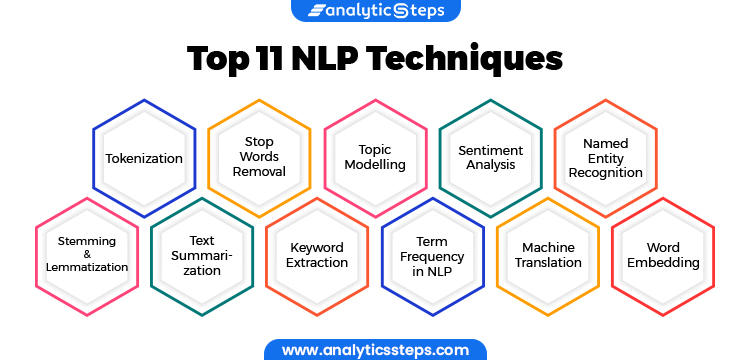

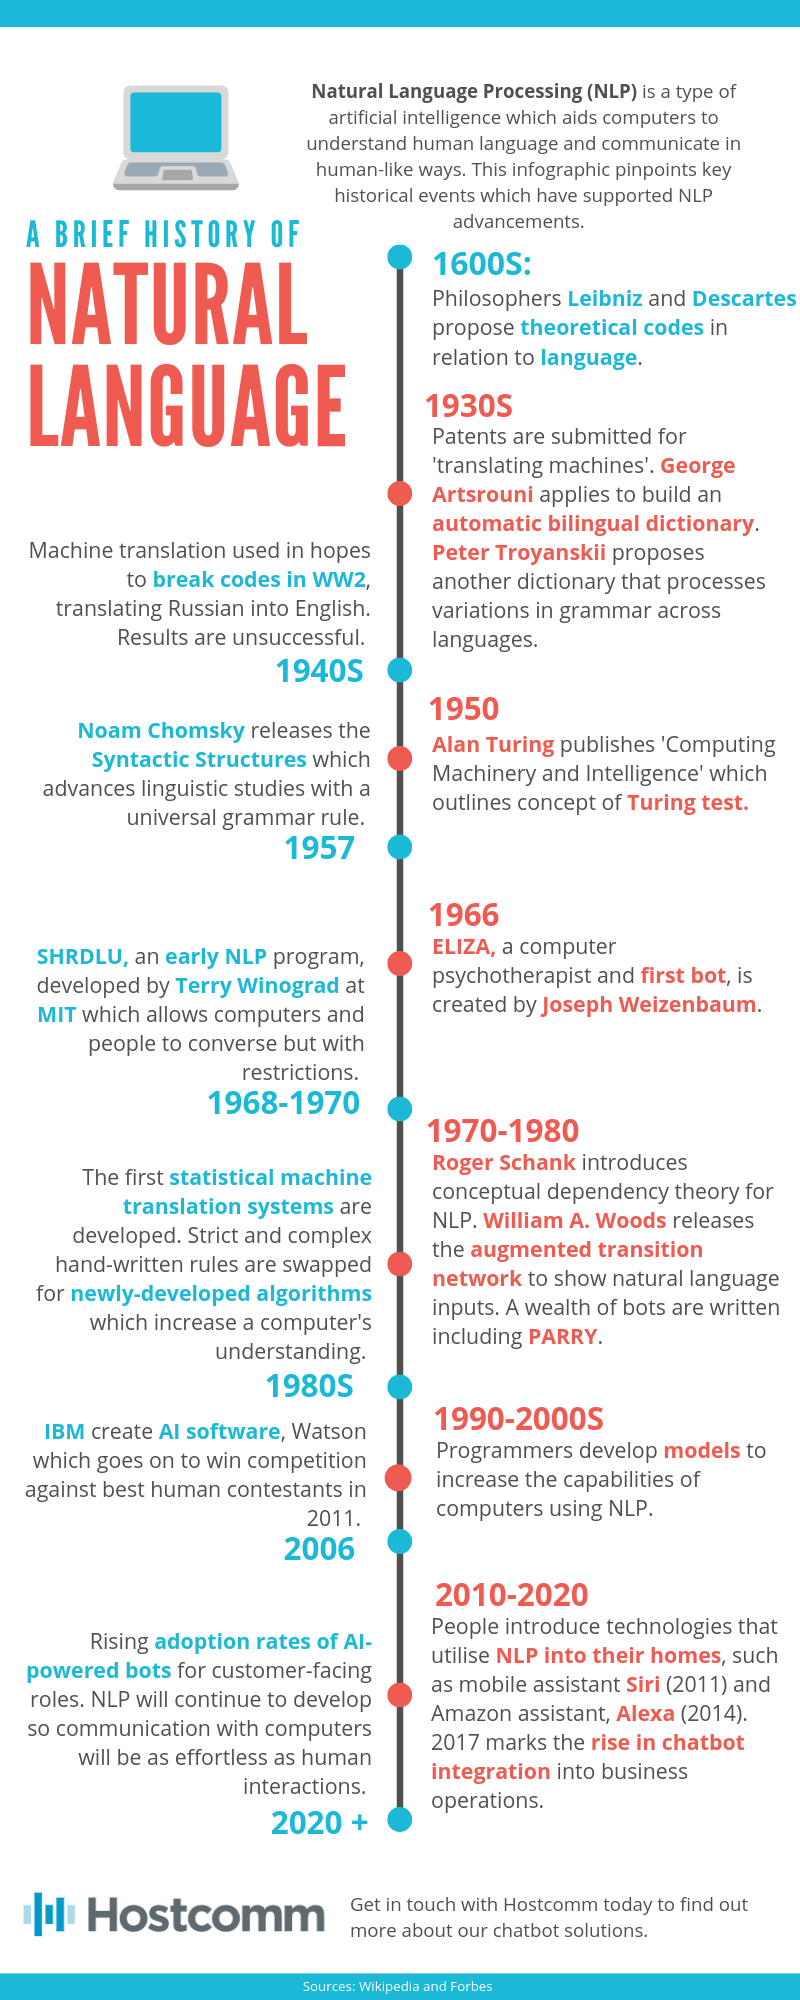

# Named-entity recognition
> Identify the who, what, and where of a piece of text using pre-trained NLP models.

In [98]:
from IPython.display import HTML, display

def set_css():
  display(HTML('''
  <style>
    pre {
        white-space: pre-wrap;
    }
  </style>
  '''))
get_ipython().events.register('pre_run_cell', set_css)

In [99]:
from pprint import pprint
import matplotlib.pyplot as plt
import pandas as pd
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
import random

## Named Entity Recognition
- Named Entity Recognition (NER)
    - NLP task to identify important named entities in the text
        - People, places, organizations
        - Dates, states, works of art
    - Can be used alongside topic identification
    - Who? What? When? Where?

### NER with NLTK
Using `nltk` to find the named entities in Amazon pantry reviews.


In [100]:
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('punkt')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

* NE Type and Examples
* ORGANIZATION - Georgia-Pacific Corp., WHO
* PERSON - Eddy Bonte, President Obama
* LOCATION - Murray River, Mount Everest
* DATE - June, 2008-06-29
* TIME - two fifty a m, 1:30 p.m.
* MONEY - 175 million Canadian Dollars, GBP 10.40
* PERCENT - twenty pct, 18.75 %
* FACILITY - Washington Monument, Stonehenge
* GPE - South East Asia, Midlothian
* *GPE = geopolitical entities


In [101]:

df = pd.read_json("https://datarepo.eng.ucsd.edu/mcauley_group/data/amazon_v2/categoryFiles/Prime_Pantry.json.gz", lines=True)
# df[df["asin"]=="B000EVOSE4"]

In [102]:
for review_test in random.sample(df['reviewText'][df["overall"]==1].astype(str).tolist(), 10):
  # Tokenize the article into sentences: sentences
  sentences = sent_tokenize(review_test)
  # Tokenize each sentence into words: token_sentences
  token_sentences = [word_tokenize(sent) for sent in sentences]
  # Tag each tokenized sentence into parts of speech: pos_sentences
  pos_sentences = [nltk.pos_tag(sent) for sent in token_sentences]
  # Create the named entity chunks: chunked_sentences
  chunked_sentences = nltk.ne_chunk_sents(pos_sentences, binary=False)
  # Test for stems of the tree with 'NE' tags
  chunks = ""
  for sent in chunked_sentences:
      for chunk in sent:
          if hasattr(chunk, "label"):
            chunks = f"{chunks}\n{chunk}"
  print(f"REVIEW TEXT:\n{review_test}\n\nNAMED ENTITIES:{chunks}\n\n")

REVIEW TEXT:
While I didn't buy this flour here, I thought I'd do everyone a favor by leaving a review since I made cookies with it tonight... I ran out of my Better Batter flour and thought it'd be okay to try a different flour... I was wrong!! My cookies are so flat and have a weird grainy aftertaste. The same recipe was used for Christmas cookies but with Better Batter flour and no one ever knew they were gluten free! They were SO good!! And actually looked like a cookie versus a crepe.

NAMED ENTITIES:
(ORGANIZATION Christmas/NNP)
(PERSON Better/NNP Batter/NNP)


REVIEW TEXT:
the can has a big dent.  I am so dissappointed

NAMED ENTITIES:


REVIEW TEXT:
The product was open

NAMED ENTITIES:


REVIEW TEXT:
No idea why I paid almost 30.00 for trial size product

NAMED ENTITIES:


REVIEW TEXT:
If I could give negative or no stars for this product I would! It's horrible! The title is misleading, there is nothing organic about this hand wash. It is full of nasty chemicals, and feels sti